In [16]:
from Code.STData import STData
from Code.Constants import homepath, cityparams
data = STData('../', cityparams['bcn'], 'twitter')

data.read_data()
data.info()

Reading Data ...
A=  twitter
C=  ('mongodb://atalaya-barcelona.mooo.com:27017/', (41.2, 41.65, 1.9, 2.4), 'bcn', None, 120, None)
D=  (220853,)


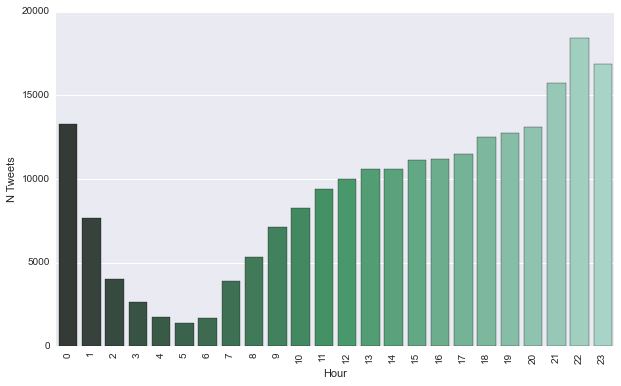

In [17]:
%matplotlib inline
from pylab import *
import pandas as pd
import seaborn as sn
hourly = pd.DataFrame({'Hour': range(24), 'Tweets': data.hourly_table()})

f, ax = plt.subplots(figsize=(10, 6))
sn.barplot(x= 'Hour', y='Tweets', palette="BuGn_d", data=hourly)
ax.set(ylabel="N Tweets", xlabel="Hour")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

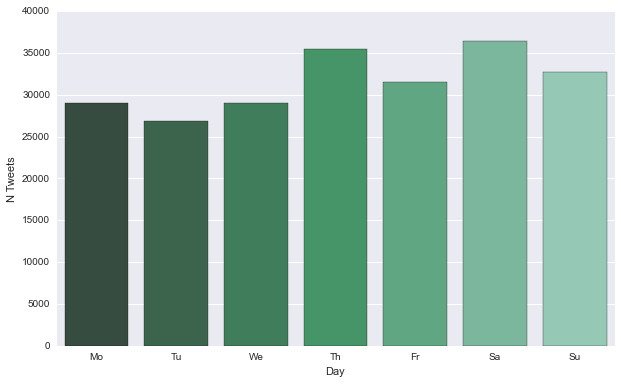

In [18]:
daily = pd.DataFrame({'Day': ['Mo', 'Tu', 'We', 'Th', 'Fr', 'Sa', 'Su'], 'Tweets': data.daily_table()})

f, ax = plt.subplots(figsize=(10, 6))
sn.barplot(x= 'Day', y='Tweets', palette="BuGn_d", data=daily)
ax.set(ylabel="N Tweets", xlabel="Day")
plt.show()